In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plot

In [2]:
%matplotlib inline

In [3]:
from numpy.random import randn

(array([ 5.,  5.,  3.,  5.,  8.,  7.,  6., 12., 10.,  9.,  9.,  4.,  5.,
         4.,  2.,  3.,  0.,  1.,  1.,  1.]),
 array([-1.97016741, -1.70971485, -1.4492623 , -1.18880974, -0.92835719,
        -0.66790463, -0.40745208, -0.14699952,  0.11345303,  0.37390559,
         0.63435815,  0.8948107 ,  1.15526326,  1.41571581,  1.67616837,
         1.93662092,  2.19707348,  2.45752603,  2.71797859,  2.97843114,
         3.2388837 ]),
 <a list of 20 Patch objects>)

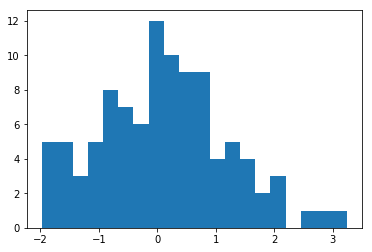

In [6]:
ds1 = randn(100)
plot.hist(ds1,bins=20)

(array([ 3.,  3.,  7., 13., 11., 15., 11., 10.,  4.,  3.]),
 array([-2.41882627, -1.95044073, -1.48205518, -1.01366964, -0.54528409,
        -0.07689855,  0.391487  ,  0.85987254,  1.32825809,  1.79664363,
         2.26502917]),
 <a list of 10 Patch objects>)

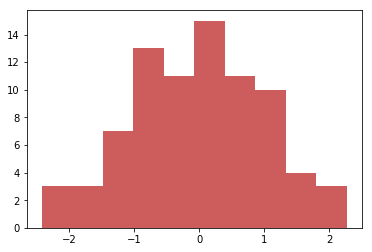

In [8]:
ds2 = randn(80)
plot.hist(ds2, color='indianred')

/Users/MartynBale/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/MartynBale/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.10674967, 0.05337483, 0.        , 0.1601245 , 0.1601245 ,
        0.21349933, 0.320249  , 0.37362383, 0.26687416, 0.320249  ,
        0.42699866, 0.37362383, 0.1601245 , 0.42699866, 0.37362383,
        0.1601245 , 0.21349933, 0.        , 0.10674967, 0.05337483]),
 array([-2.41882627, -2.1846335 , -1.95044073, -1.71624795, -1.48205518,
        -1.24786241, -1.01366964, -0.77947686, -0.54528409, -0.31109132,
        -0.07689855,  0.15729422,  0.391487  ,  0.62567977,  0.85987254,
         1.09406531,  1.32825809,  1.56245086,  1.79664363,  2.0308364 ,
         2.26502917]),
 <a list of 20 Patch objects>)

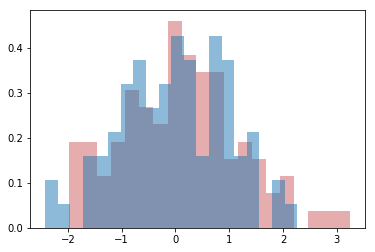

In [9]:
plot.hist(ds1, normed=True, color='indianred',alpha=0.5,bins=20)
plot.hist(ds2,normed=True,alpha=0.5,bins=20)

In [10]:
data1 = randn(1000)
data2 = randn(1000)

/Users/MartynBale/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


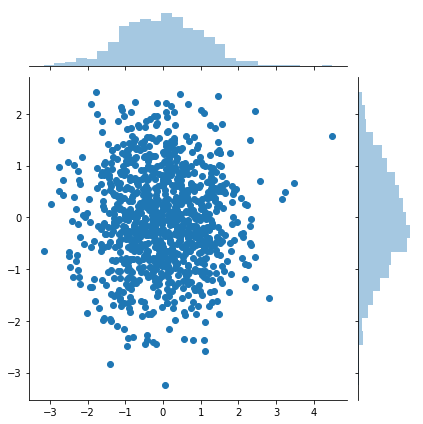

In [11]:
sns.jointplot(data1,data2)

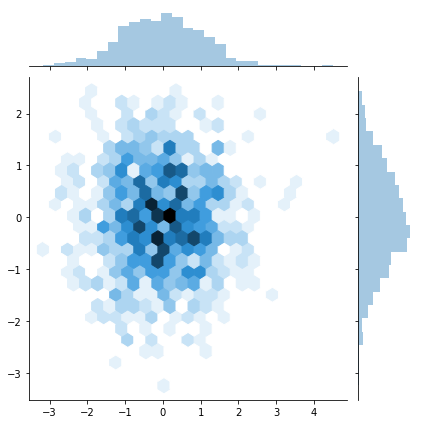

In [12]:
sns.jointplot(data1,data2,kind='hex')

(0, 1)

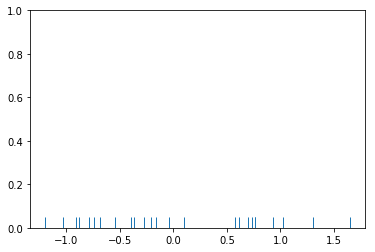

In [15]:
#KDE Plots

ds1 = randn(25)
sns.rugplot(ds1)
plot.ylim(0,1)

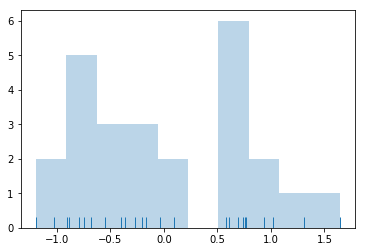

In [17]:
plot.hist(ds1,alpha=0.3)
sns.rugplot(ds1)

(0, 1)

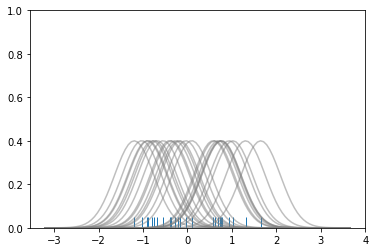

In [19]:
sns.rugplot(ds1)

xmin = ds1.min() - 2
xmax = ds1.max() + 2

x_axis = np.linspace(xmin,xmax,100)
bandwidth = ((4*ds1.std()**5)/(3*len(ds1)))**0.2

kerlist = []

for i in ds1:
    ker = stats.norm(i,bandwidth).pdf(x_axis)
    kerlist.append(ker)

    ker = ker/ker.max()
    ker = ker*0.4
    
    plot.plot(x_axis, ker,color='grey',alpha=0.5)

plot.ylim(0,1)

Text(0.5, 0.98, 'sum of basis functions')

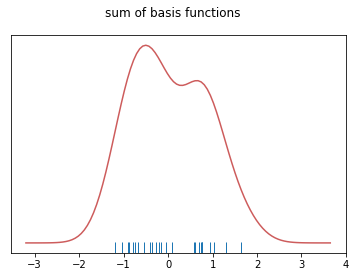

In [21]:
sum_kde = np.sum(kerlist,axis=0)

fig = plot.plot(x_axis,sum_kde, color='indianred')
sns.rugplot(ds1)
plot.yticks([])

plot.suptitle('sum of basis functions')


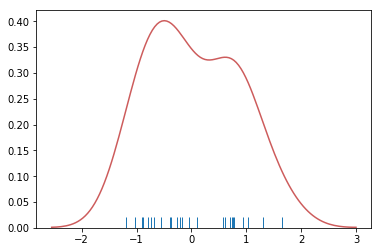

In [26]:
sns.kdeplot(ds1, color='indianred')
sns.rugplot(ds1)

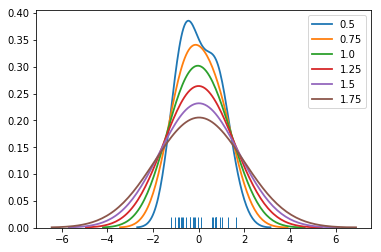

In [28]:
sns.rugplot(ds1)

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(ds1,bw=bw,lw=1.8, label = bw)

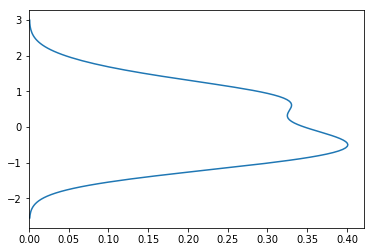

In [29]:
sns.kdeplot(ds1,vertical=True)

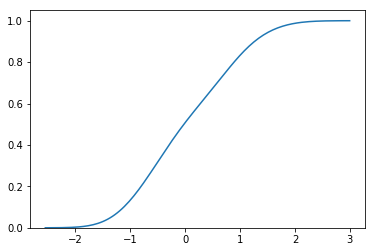

In [30]:
sns.kdeplot(ds1,cumulative=True)

/Users/MartynBale/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


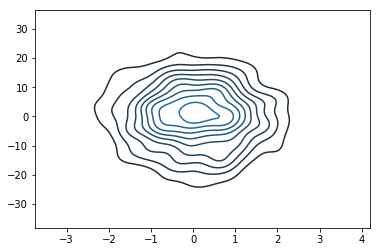

In [34]:
mean = [0,0]
covar = [[1,0],[0,100]]
ds2 = np.random.multivariate_normal(mean,covar,1000)

df = pd.DataFrame(ds2,columns=['x','y'])

sns.kdeplot(df)

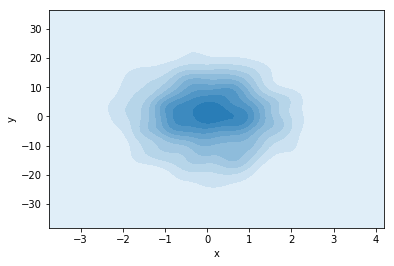

In [36]:
sns.kdeplot(df.x,df.y,shade=True)

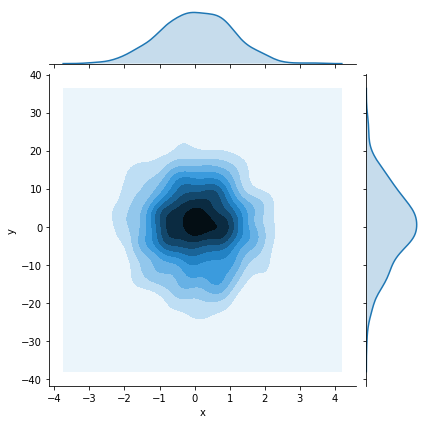

In [40]:
sns.jointplot('x','y',df,kind='kde')

In [43]:
ds1 = randn(100)

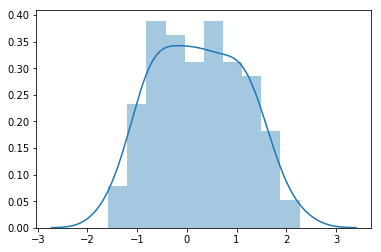

In [45]:
sns.distplot(ds1,bins=10)

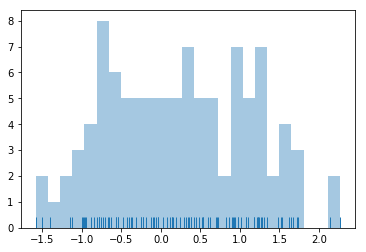

In [51]:
sns.distplot(ds1,bins=25,rug=True,hist=True,kde=False)

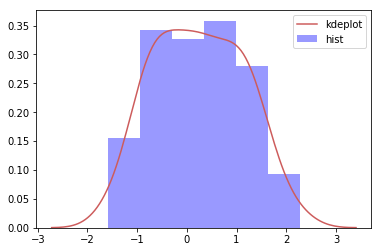

In [52]:
sns.distplot(ds1,
            kde_kws = {'color':'indianred','label':'kdeplot'},
            hist_kws = {'color':'blue','label':'hist'})

In [56]:
from pandas import Series,DataFrame
ser1 = Series(ds1,name='MyData')

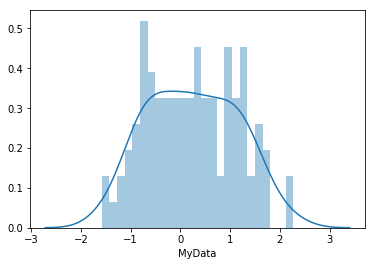

In [55]:
sns.distplot(ser1,bins=25)

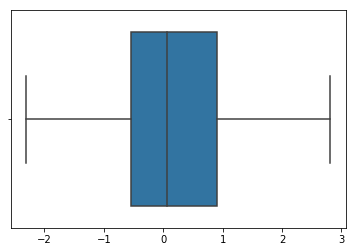

In [74]:
ds2 = randn(100)
sns.boxplot([ds1,ds2])

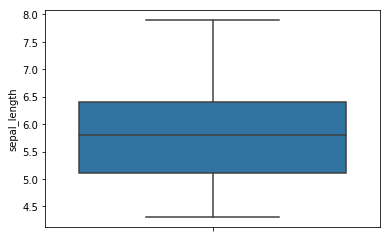

In [76]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Make boxplot for one group only
sns.boxplot( y=df["sepal_length"] )
#sns.plt.show()

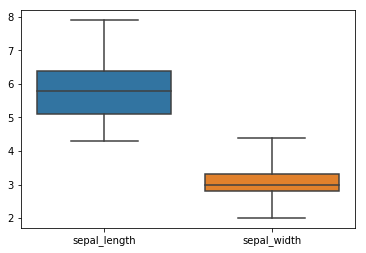

In [87]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
sns.boxplot(data=df.iloc[:,0:2],whis=np.inf)
#sns.plt.show()


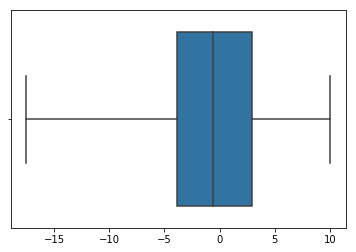

In [95]:
#Normal dist
ds1 = stats.norm(0,5).rvs(100)

#Two gamma dists
ds2 = np.concatenate([stats.gamma(5).rvs(50)-1,-1*stats.gamma(5).rvs(50)])


df_dist = pd.DataFrame(columns=['normal','gamma'])

df_dist.normal = ds1
df_dist.gamma = ds2
sns.boxplot(ds1,whis=np.inf)


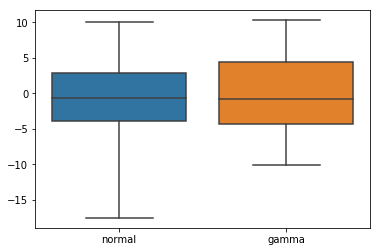

In [97]:
sns.boxplot(data=df_dist,whis=np.inf)

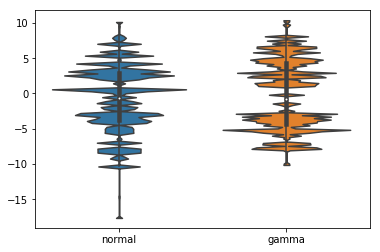

In [101]:
sns.violinplot(data=df_dist,bw=0.01)

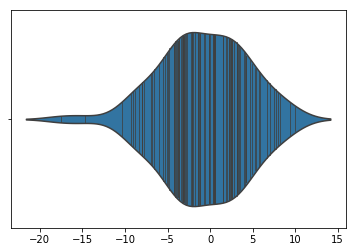

In [102]:
sns.violinplot(ds1,inner='stick')

In [103]:
tips = sns.load_dataset('tips')

In [104]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


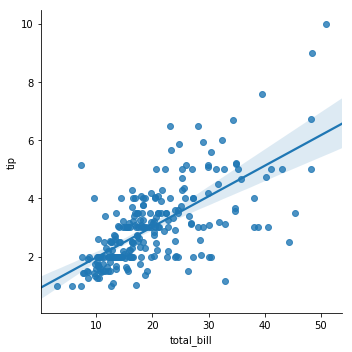

In [105]:
sns.lmplot('total_bill','tip',tips)

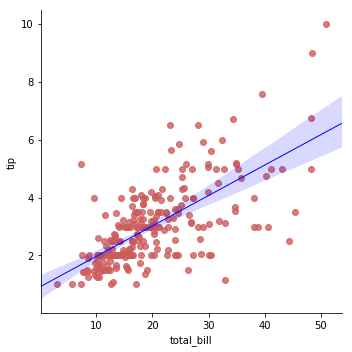

In [106]:
sns.lmplot('total_bill','tip',tips,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

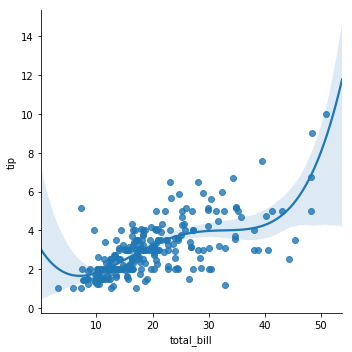

In [109]:
sns.lmplot('total_bill','tip',tips,order=4)

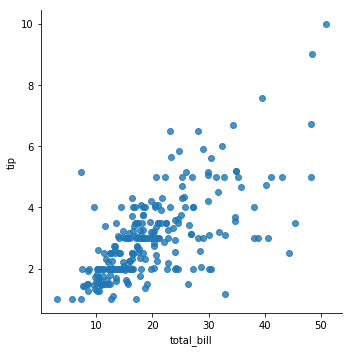

In [111]:
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [112]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [113]:
tips['tip_pect'] = 100* tips.tip / tips.total_bill 

In [114]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


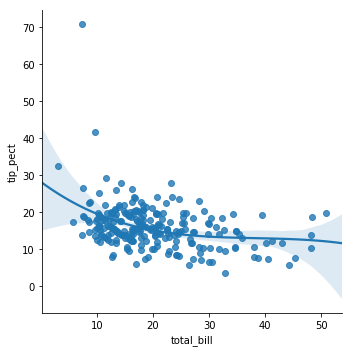

In [117]:
sns.lmplot('total_bill','tip_pect',tips,order=3)

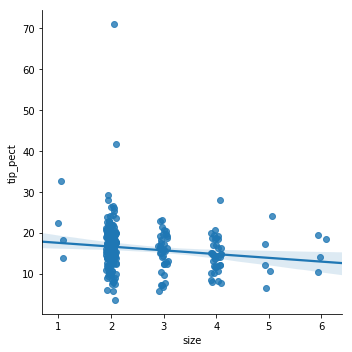

In [120]:
sns.lmplot('size','tip_pect',tips,x_jitter=0.1)

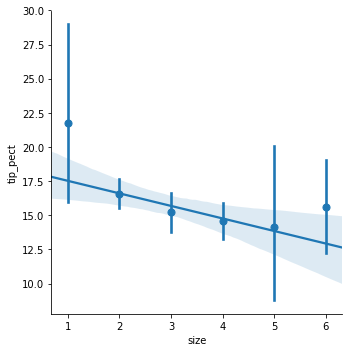

In [123]:
sns.lmplot('size','tip_pect',tips,x_estimator=np.mean)

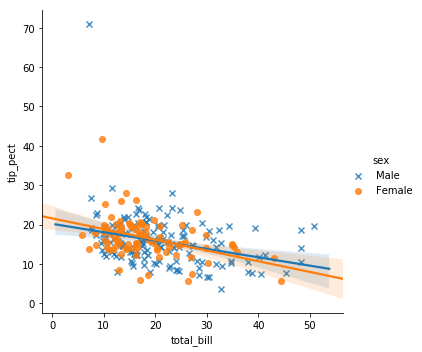

In [126]:
sns.lmplot('total_bill','tip_pect',tips,hue='sex',markers=['x','o'])

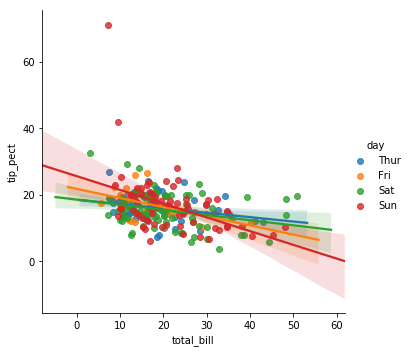

In [127]:
sns.lmplot('total_bill','tip_pect',tips,hue='day')

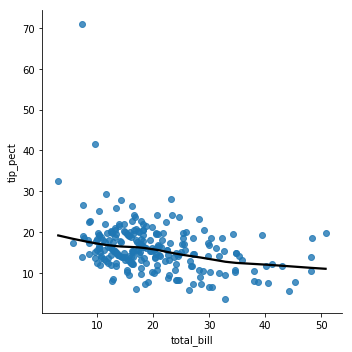

In [128]:
sns.lmplot('total_bill','tip_pect',tips,lowess=True,line_kws={'color':'black'})

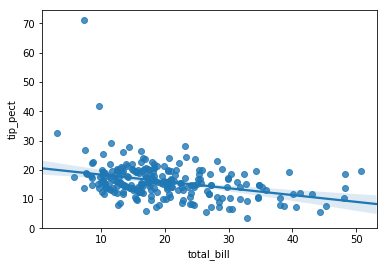

In [129]:
sns.regplot('total_bill','tip_pect',tips)

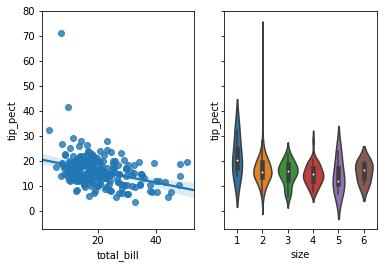

In [143]:
fig, (ax1,ax2) = plot.subplots(1,2,sharey=True)

sns.regplot('total_bill','tip_pect',tips,ax=ax1)
sns.violinplot(y=tips['tip_pect'],x=tips['size'],ax=ax2)

In [144]:
flight_dframe = sns.load_dataset('flights')

In [145]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [146]:
flight_dframe  = flight_dframe.pivot('month','year','passengers')
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


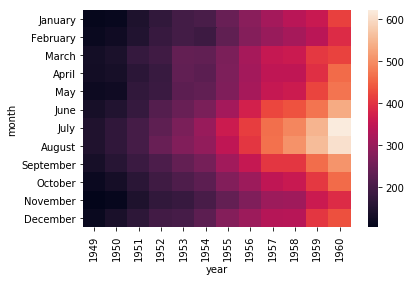

In [147]:
sns.heatmap(flight_dframe)

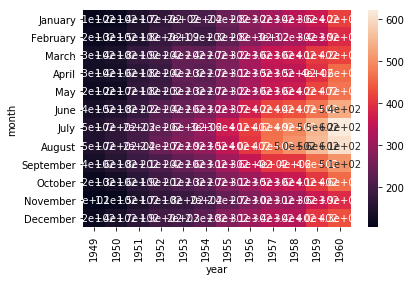

In [148]:
sns.heatmap(flight_dframe,annot=True)

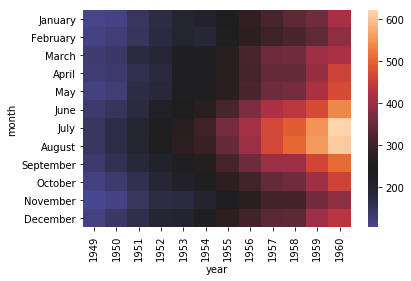

In [150]:
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

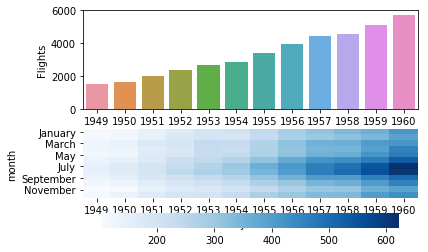

In [156]:
f,(ax1,ax2) = plot.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=ax1)
sns.heatmap(flight_dframe,cmap='Blues',ax=ax2,cbar_kws={'orientation':'horizontal'})

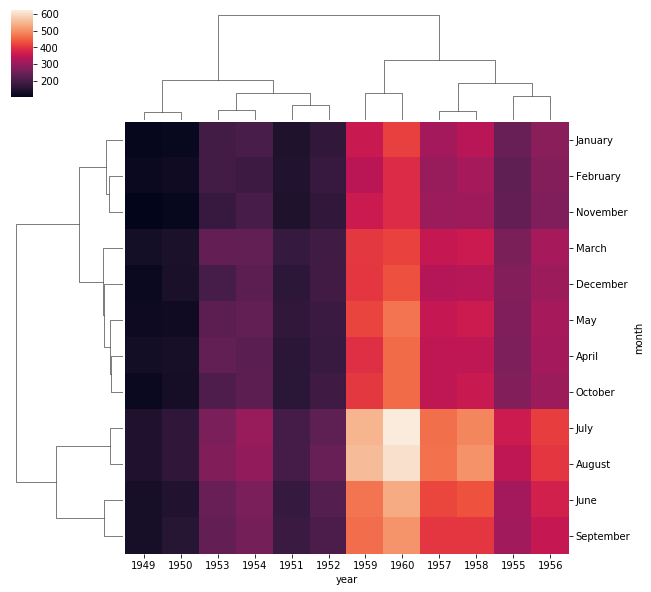

In [157]:
sns.clustermap(flight_dframe)

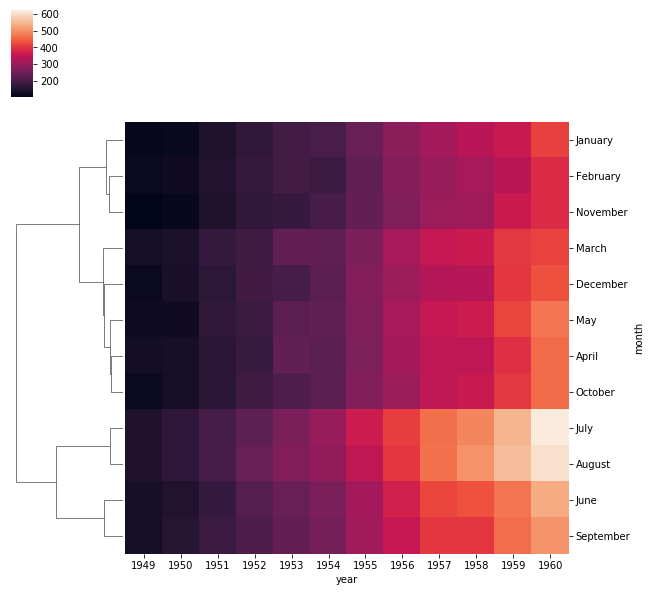

In [158]:
sns.clustermap(flight_dframe,col_cluster=False)

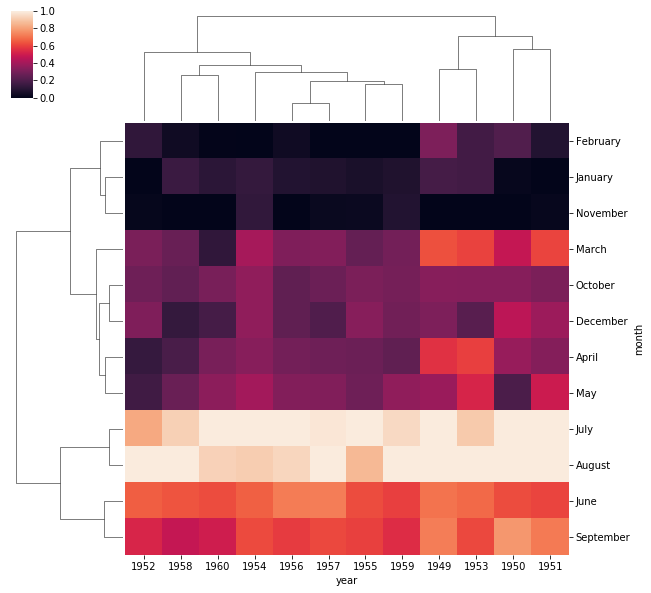

In [159]:
sns.clustermap(flight_dframe,standard_scale=1)

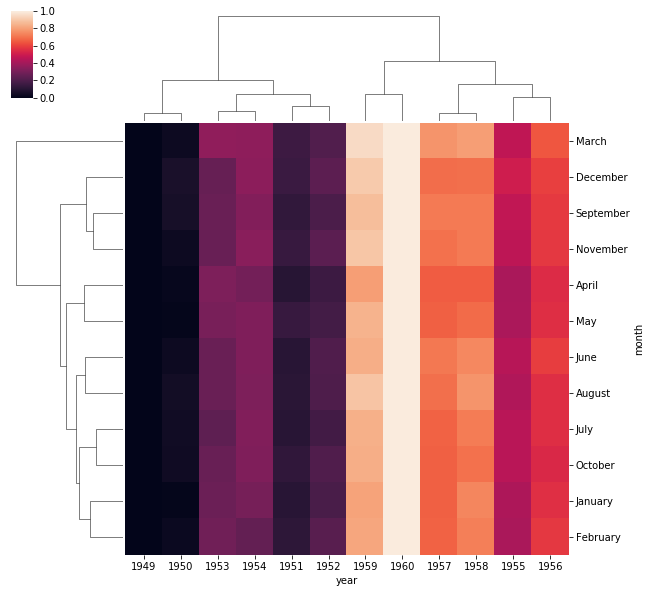

In [160]:
sns.clustermap(flight_dframe,standard_scale=0)

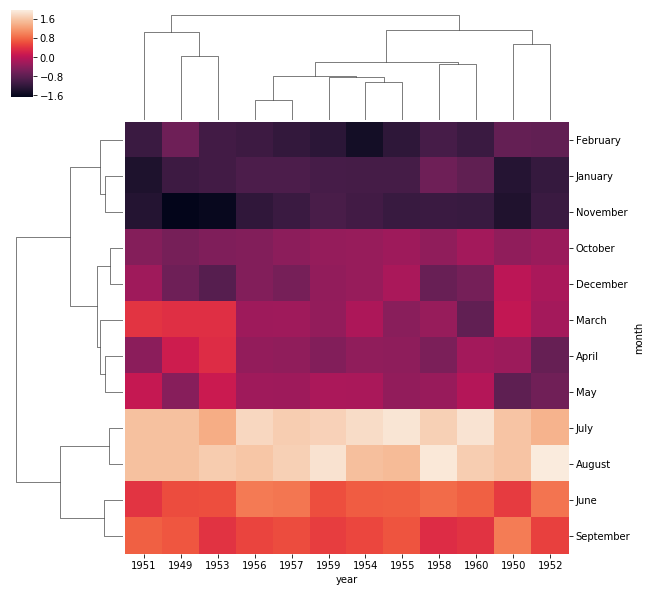

In [161]:
sns.clustermap(flight_dframe,z_score=1)